In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go 
import plotly.io as pio
import plotly.colors as colors 
pio.templates.default = "plotly_white" 

In [2]:
data = pd.read_csv(r"C:/python projrct/Sample - Superstore.csv",lineterminator="\n",encoding="latin-1")
data.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit\r
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [3]:
data.count()

Row ID           9994
Order ID         9994
Order Date       9994
Ship Date        9994
Ship Mode        9994
Customer ID      9994
Customer Name    9994
Segment          9994
Country          9994
City             9994
State            9994
Postal Code      9994
Region           9994
Product ID       9994
Category         9994
Sub-Category     9994
Product Name     9994
Sales            9994
Quantity         9994
Discount         9994
Profit\r         9994
dtype: int64

In [4]:
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit\r         0
dtype: int64

In [5]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit\r'],
      dtype='object')

In [6]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit\r
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [8]:
data["Ship Date"]=data["Ship Date"].astype('datetime64[ns]')
data["Order Date"]=data["Order Date"].astype('datetime64[ns]')

In [9]:
data["Order_year"]= data["Order Date"].dt.year
data["Order_month"]= data["Order Date"].dt.month
data["Day_of_week"]=data["Order Date"].dt.day_of_week
data["Order_month_name"]= data["Order Date"].dt.month_name
data["Order_month_name"]= data["Order Date"].dt.month_name()

In [10]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit\r',
       'Order_year', 'Order_month', 'Day_of_week', 'Order_month_name'],
      dtype='object')

# Monthly Sales Anaylsis

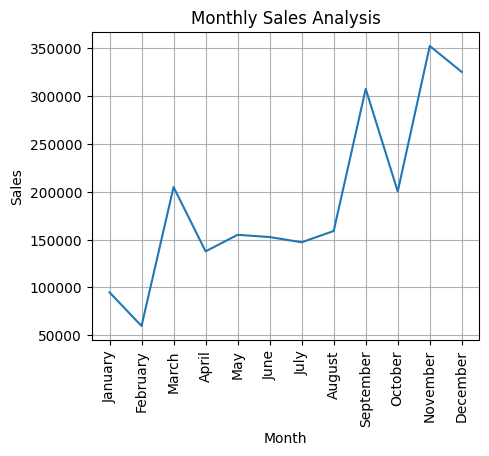

In [11]:
month= data.groupby(["Order_month_name","Order_month"])["Sales"].sum().sort_index(level="Order_month",ascending=True)
month =pd.DataFrame(month)
month.reset_index(inplace=True)
month

plt.figure(figsize=(5,4))
plt.plot("Order_month_name","Sales",data = month)

plt.xticks(rotation=90)
plt.grid()
plt.title("Monthly Sales Analysis")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

In [12]:
px.line(month,x = "Order_month_name",y="Sales",title="Month-wise sale")

**November month getting higest sales**

# Sales by Category

In [13]:
sales_by_category =pd.DataFrame(data.groupby("Category")["Sales"].sum().sort_index().reset_index())


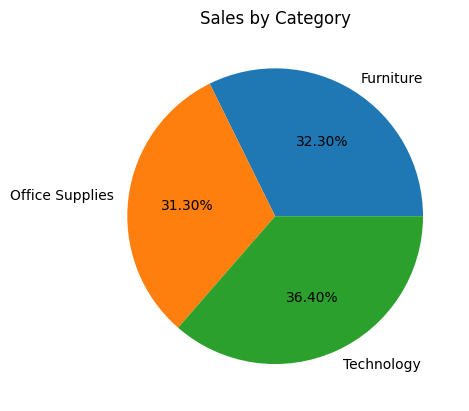

In [14]:
plt.pie(sales_by_category["Sales"],labels=sales_by_category["Category"],autopct="%0.2f%%")
plt.title("Sales by Category")
plt.show()

In [15]:
px.pie(sales_by_category,values="Sales",names="Category",title="Sales by Category", color_discrete_sequence=px.colors.sequential.RdBu)

# Sales by Sub Category


In [16]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit\r',
       'Order_year', 'Order_month', 'Day_of_week', 'Order_month_name'],
      dtype='object')

In [17]:
sales_by_sub_category = pd.DataFrame(data.groupby("Sub-Category")["Sales"].sum().sort_index().reset_index())
sales_by_sub_category.head(2)


,Sub-Category,Sales
0,Accessories,167380.318
1,Appliances,107532.161


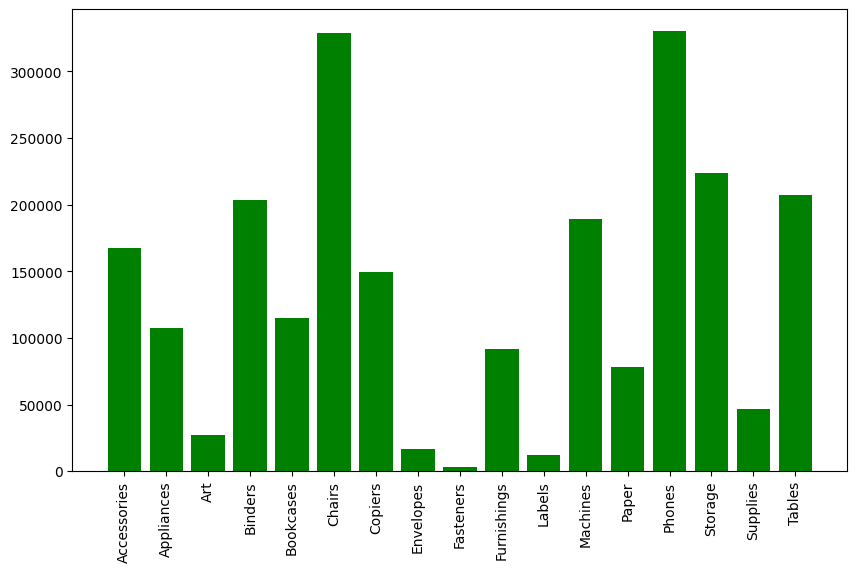

In [18]:
plt.figure(figsize=(10,6))
plt.bar("Sub-Category","Sales" ,data =sales_by_sub_category ,color="g")
plt.xticks(rotation = 90)
plt.show()

In [19]:
px.bar(sales_by_sub_category,x= "Sub-Category",y = "Sales",title="Sales analysis by sub-category")

**Chairs and Phones are the most selling Product**

# Monthly Profit

In [23]:
data.rename(columns={"Profit\r":"Profit"},inplace=True)

In [21]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit\r',
       'Order_year', 'Order_month', 'Day_of_week', 'Order_month_name'],
      dtype='object')

In [24]:
profit_by_month =pd.DataFrame(data.groupby(["Order_month_name","Order_month"])["Profit"].sum().sort_index(level="Order_month").reset_index())
profit_by_month

,Order_month_name,Order_month,Profit
0,January,1,9134.4461
1,February,2,10294.6107
2,March,3,28594.6872
3,April,4,11587.4363
4,May,5,22411.3078
5,June,6,21285.7954
6,July,7,13832.6648
7,August,8,21776.9384
8,September,9,36857.4753
9,October,10,31784.0413


In [57]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Order_year',
       'Order_month', 'Day_of_week', 'Order_month_name'],
      dtype='object')

In [25]:
px.line(profit_by_month,x = "Order_month_name",y = "Profit")

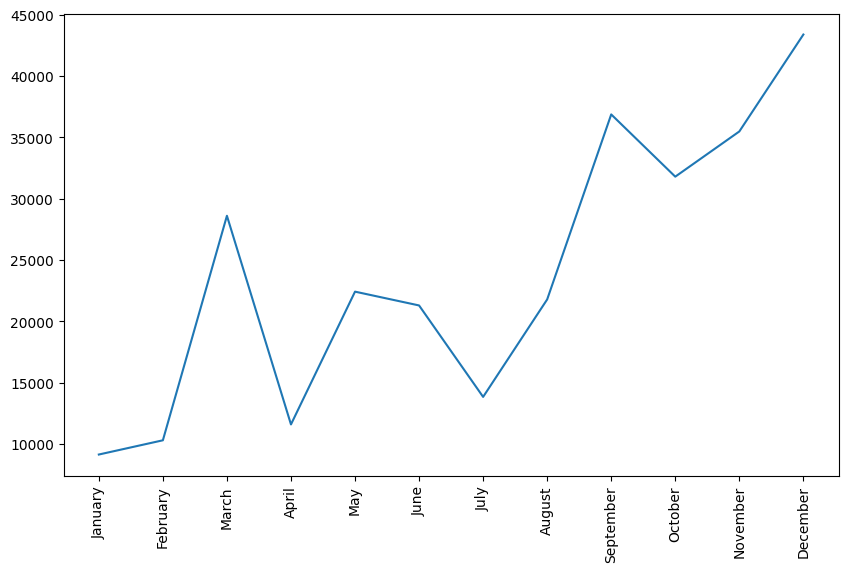

In [67]:
plt.figure(figsize=(10,6))
plt.plot("Order_month_name","Profit",data = profit_by_month,)
plt.xticks(rotation = 90)
plt.show()

**December has highest profit and January has low**

# profit by category and sub-category

In [32]:
profit_by_sub_category = pd.DataFrame(data.groupby("Sub-Category")["Profit"].sum().sort_index().reset_index())
profit_by_sub_category.head(2)

,Sub-Category,Profit
0,Accessories,41936.6357
1,Appliances,18138.0054


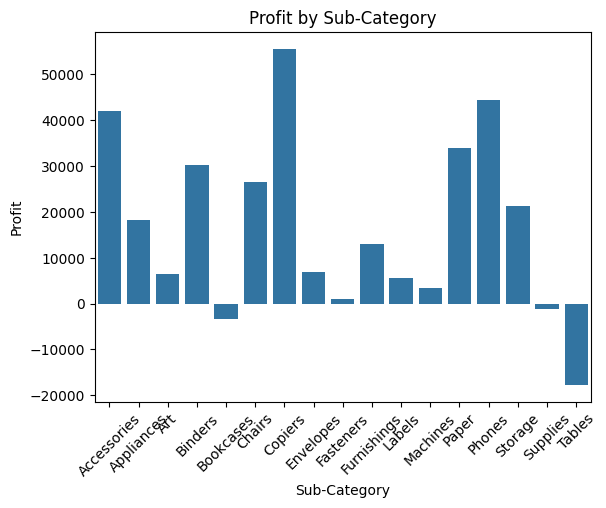

In [34]:
sns.barplot(x = "Sub-Category",y = "Profit",data=profit_by_sub_category)
plt.xticks(rotation=45) # Rotate x-axis labels for better readability 
plt.title('Profit by Sub-Category') 
plt.show()

In [38]:
px.bar(profit_by_sub_category,x = "Sub-Category",y = "Profit")

In [36]:
profit_by_category = pd.DataFrame(data.groupby("Category")["Profit"].sum().sort_index().reset_index())
profit_by_category.head(2)

,Category,Profit
0,Furniture,18451.2728
1,Office Supplies,122490.8008


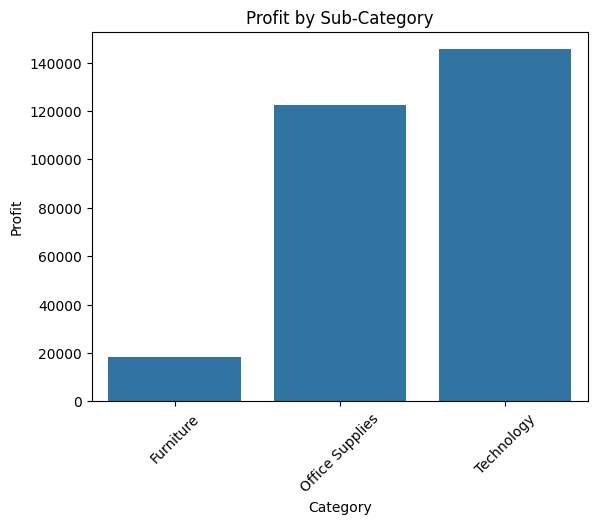

In [37]:
sns.barplot(x = "Category",y = "Profit",data=profit_by_category)
plt.xticks(rotation=45) # Rotate x-axis labels for better readability 
plt.title('Profit by Sub-Category') 
plt.show()

In [39]:
px.bar(profit_by_category,x = "Category",y = "Profit")

# Sales and Profit Analysis by Customer Segment

In [53]:
sales_profit_by_segment = data.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

color_palette = colors.qualitative.Pastel

fig = go.Figure()
fig.add_trace(go.Bar(x=sales_profit_by_segment['Segment'], 
                     y=sales_profit_by_segment['Sales'], 
                     name='Sales',
                     marker_color=color_palette[0]))

fig.add_trace(go.Bar(x=sales_profit_by_segment['Segment'], 
                     y=sales_profit_by_segment['Profit'], 
                     name='Profit',
                     marker_color=color_palette[1]))

fig.update_layout(title='Sales and Profit Analysis by Customer Segment',
                  xaxis_title='Customer Segment', yaxis_title='Amount')

fig.show()

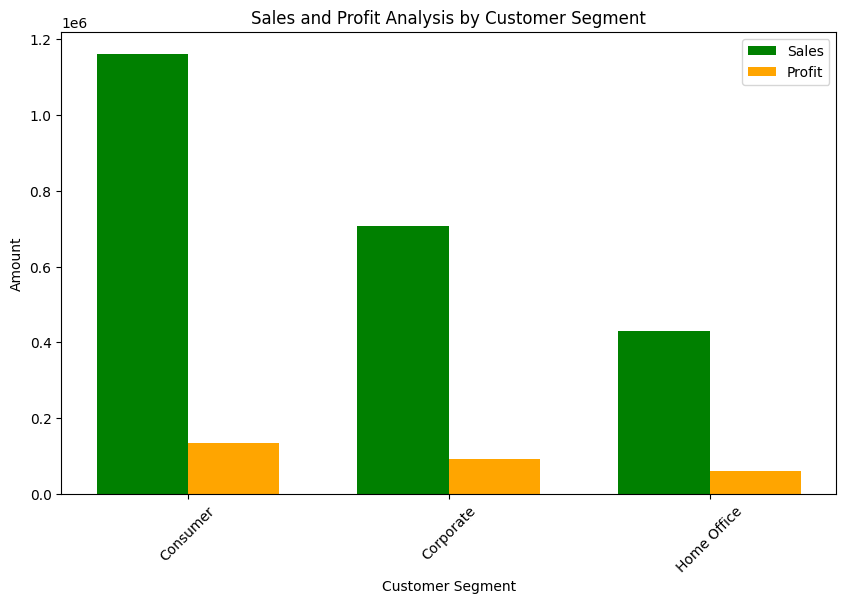

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

sales_profit_by_segment = data.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = range(len(sales_profit_by_segment))

ax.bar(index, sales_profit_by_segment['Sales'], color='g', label='Sales', width=bar_width, align='center')
ax.bar([i + bar_width for i in index], sales_profit_by_segment['Profit'], color='orange', label='Profit', width=bar_width, align='center')

ax.set_title('Sales and Profit Analysis by Customer Segment')
ax.set_xlabel('Customer Segment')
ax.set_ylabel('Amount')

ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(sales_profit_by_segment['Segment'], rotation=45)

ax.legend()
plt.show()


**consumer is the segment which have most sales and profit**

# analyse sales-to-profit ratio

In [63]:
sales_profit_by_segment = data.groupby('Segment')[['Sales', 'Profit']].sum().reset_index()
sales_profit_by_segment['Sales_to_Profit_Ratio'] = sales_profit_by_segment['Sales'] / sales_profit_by_segment['Profit']
print(sales_profit_by_segment[['Segment', 'Sales_to_Profit_Ratio']])

       Segment  Sales_to_Profit_Ratio
0     Consumer               8.659471
1    Corporate               7.677245
2  Home Office               7.125416


**Consumer segment has highest ratio**
